In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

# Exploration

In [11]:
# get data
df = pd.read_csv("survey_results.csv")

In [18]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)

    plt.show()

In [19]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\aquin\AppData\Local\Temp\ipykernel_11924\3367640698.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


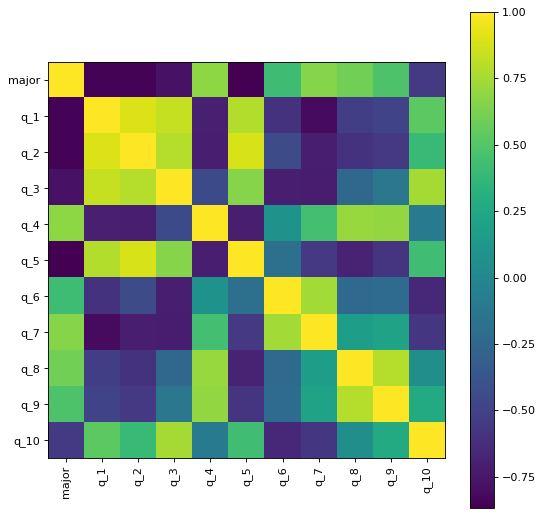

In [20]:
plotCorrelationMatrix(df, 8)

C:\Users\aquin\AppData\Local\Temp\ipykernel_11924\102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


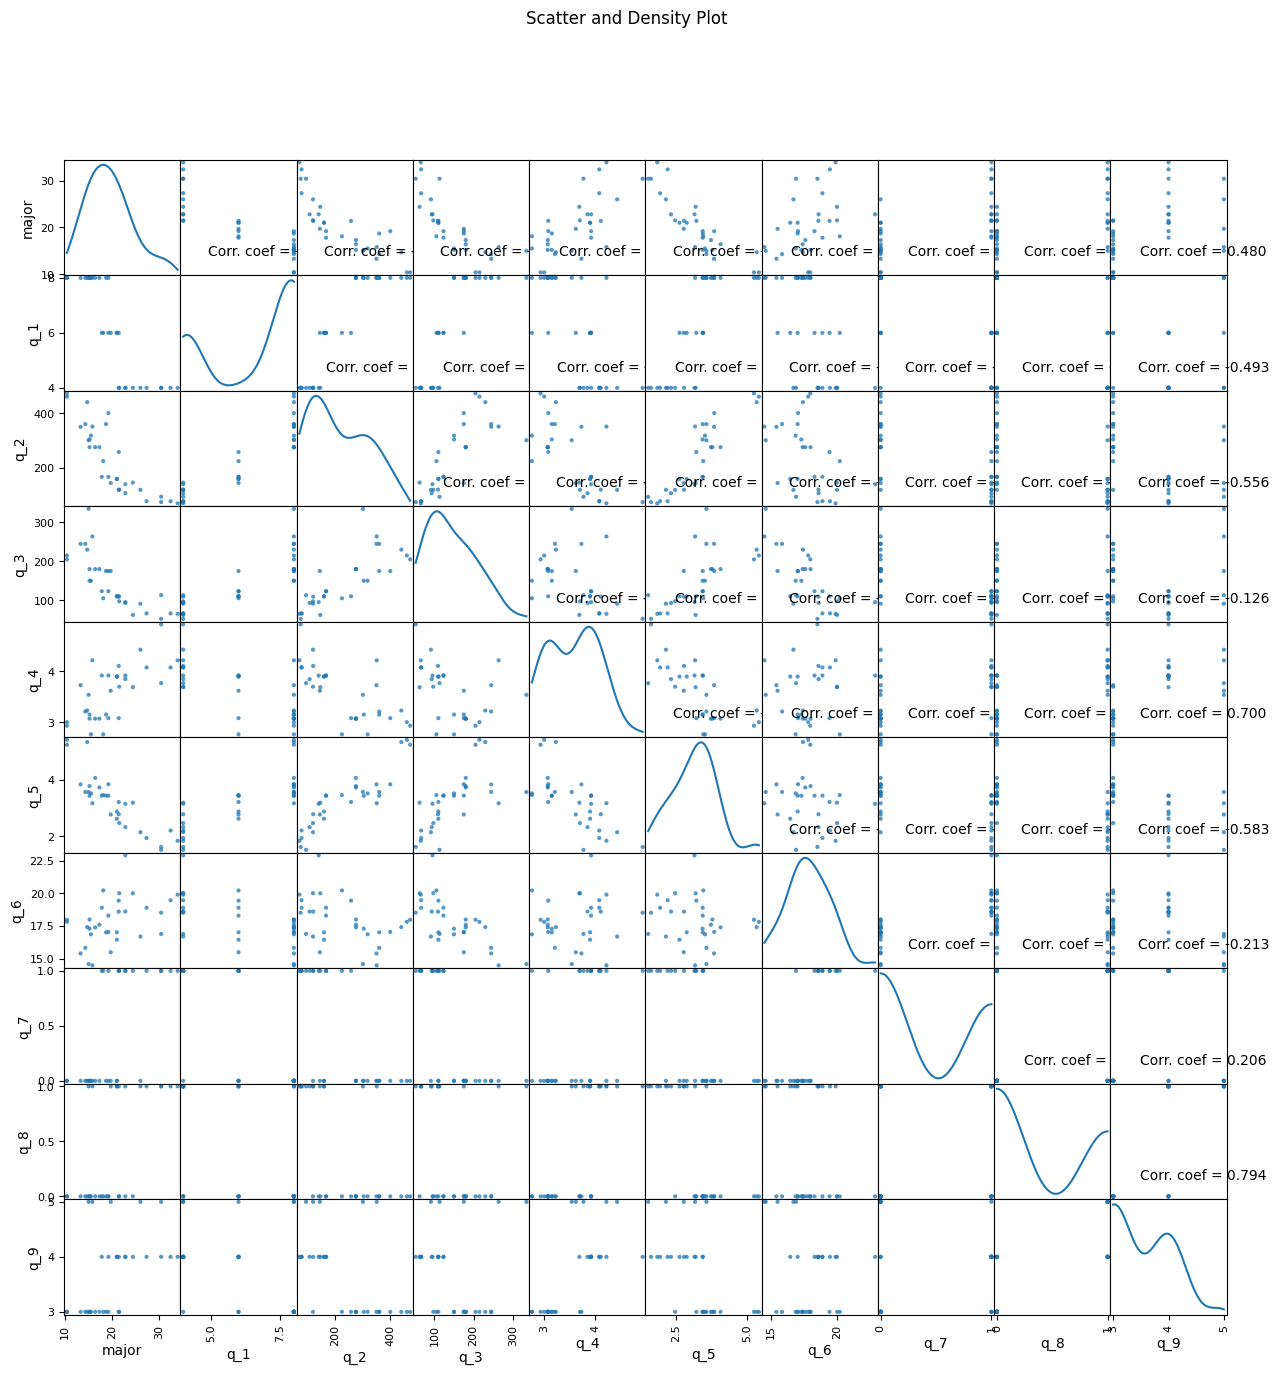

In [21]:
plotScatterMatrix(df, 15, 10)

# Regression

In [15]:
pred_var = "major"

# get data
df = pd.read_csv("survey_results.csv")
y = df[pred_var]
x = df.drop(columns=[pred_var])

# clean data
enc = OrdinalEncoder()
x = enc.fit_transform(x)
y = enc.fit_transform(np.array(y).reshape(-1, 1))

# split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
# build model
model = LinearRegression()
model.fit(x_train, y_train)

# get validation output
preds = model.predict(x_test)
error = np.linalg.norm(preds - y_test, 2)
print("Euclidean error:", error)

r_sq = model.score(x_test, y_test)
print("R^2:", r_sq)

#save model
pickle.dump(model, open("model", 'wb'))

Euclidean error: 13.136974177967389
R^2: 0.6255658784855225


# Function for use in app

In [17]:
def get_result(user_input):
    model = pickle.load(open("model", 'rb'))
    pred = model.predict([user_input])
    return pred

# test function
get_result([6,258,110,3.08,3.215,19.44,1,0,3,1])
        


array([[-106.61759505]])